In [3]:
# Titanic Dataset EDA & Data Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [7]:
# -------------------------------
# 1. Data Overview
# -------------------------------
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print("\nTrain Columns:\n", train.columns)
print("\nMissing Values:\n", train.isnull().sum())

Train Shape: (891, 12)
Test Shape: (418, 11)

Train Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())


In [19]:
# Drop Cabin (too many missing)
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

# Verify
print("\nAfter Cleaning:\n", train.isnull().sum())


After Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


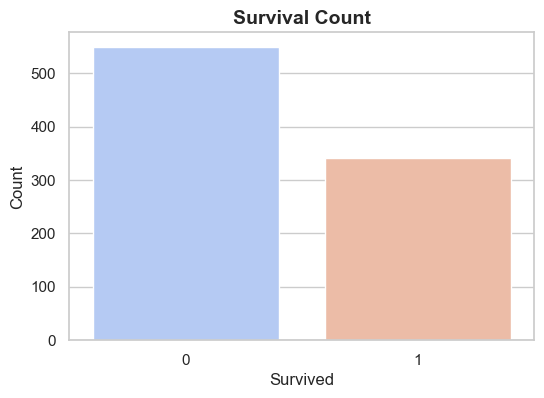

In [23]:

# -------------------------------
# 3. Exploratory Data Analysis
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train, hue='Survived', palette="coolwarm", legend=False)
plt.title("Survival Count", fontsize=14, weight="bold")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


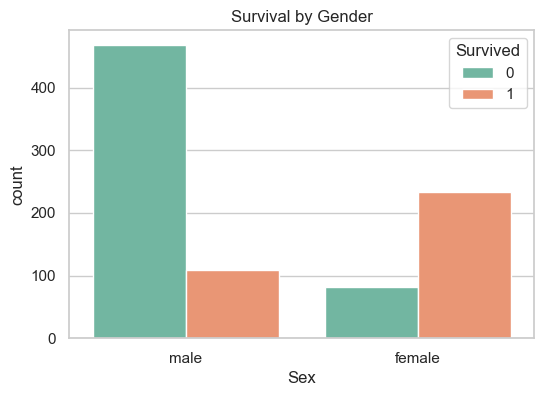

In [25]:
# Gender vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=train, palette="Set2")
plt.title("Survival by Gender")
plt.show()

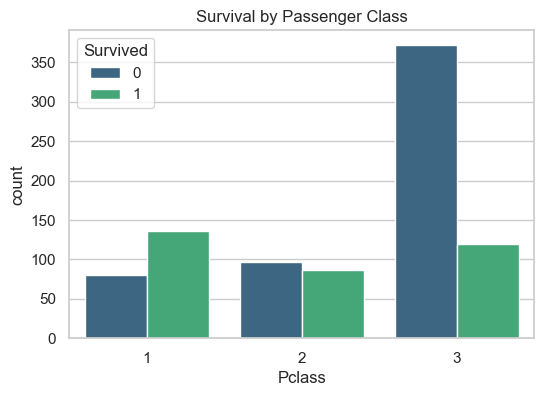

In [27]:
# Pclass vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=train, palette="viridis")
plt.title("Survival by Passenger Class")
plt.show()

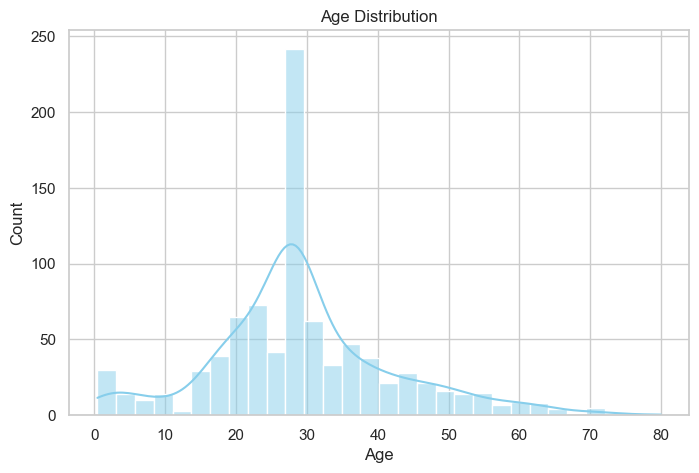

In [29]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Age'], kde=True, bins=30, color="skyblue")
plt.title("Age Distribution")
plt.show()


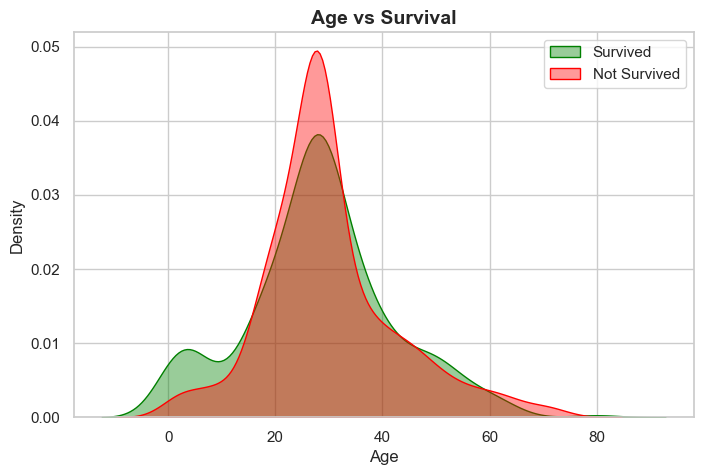

In [33]:
# Survival by Age
plt.figure(figsize=(8,5))

sns.kdeplot(train[train['Survived']==1]['Age'], label="Survived", fill=True, color="green", alpha=0.4)
sns.kdeplot(train[train['Survived']==0]['Age'], label="Not Survived", fill=True, color="red", alpha=0.4)

plt.title("Age vs Survival", fontsize=14, weight="bold")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


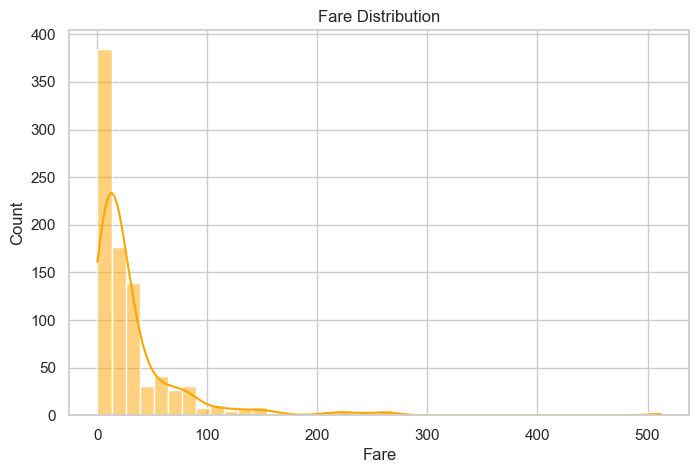

In [35]:
# Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Fare'], bins=40, kde=True, color="orange")
plt.title("Fare Distribution")
plt.show()


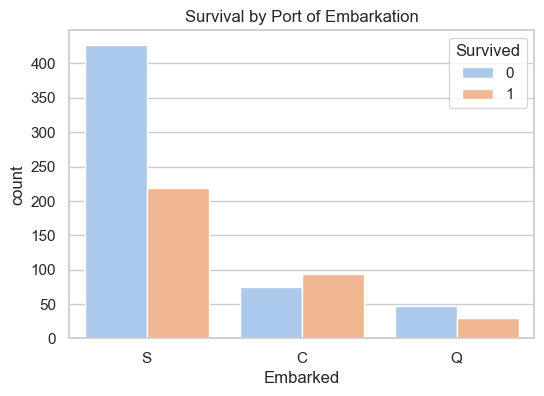

In [37]:
# Survival by Embarked
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=train, palette="pastel")
plt.title("Survival by Port of Embarkation")
plt.show()


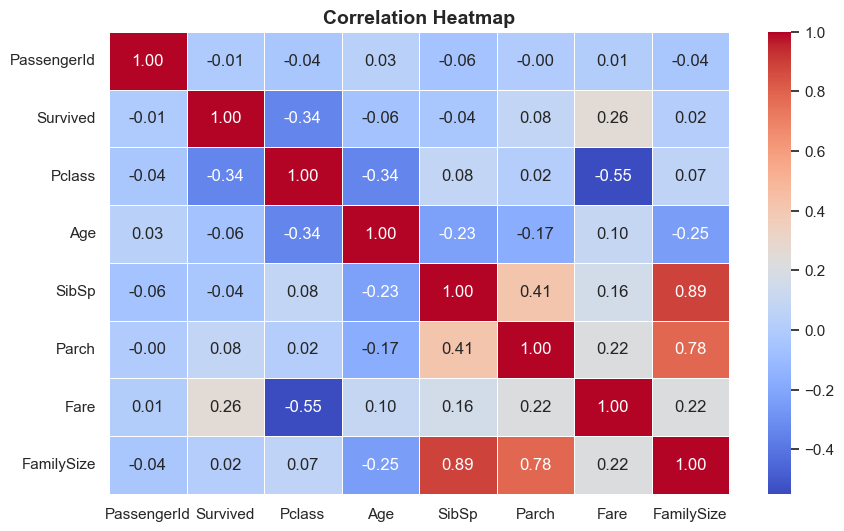

In [47]:
# Correlation Heatmap
plt.figure(figsize=(10,6))

# Use only numeric columns
corr = train.select_dtypes(include="number").corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Correlation Heatmap", fontsize=14, weight="bold")
plt.show()


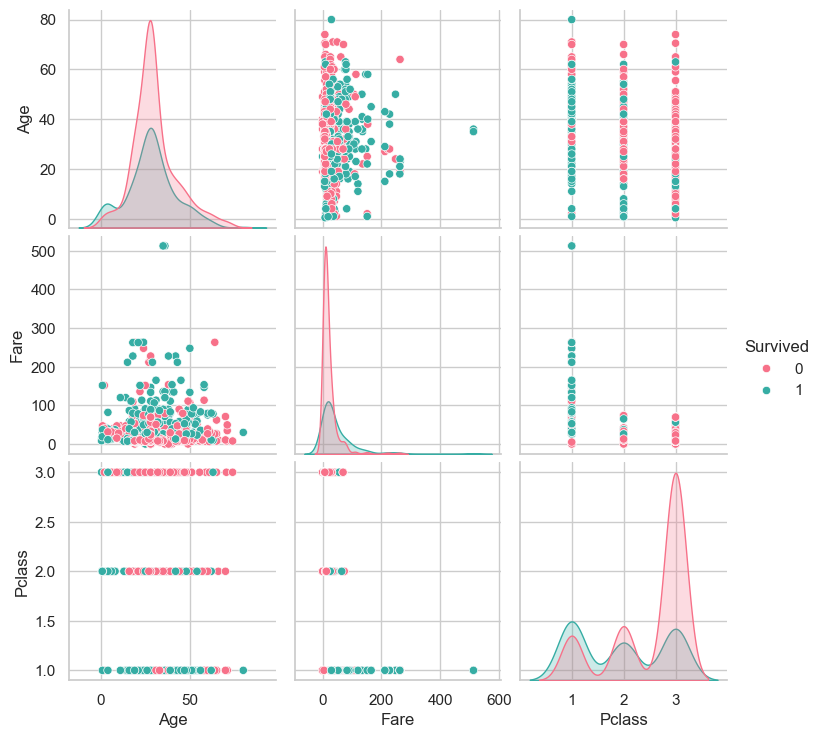

In [41]:
# Pairplot (selected variables)
sns.pairplot(train[['Survived','Age','Fare','Pclass']], hue="Survived", palette="husl")
plt.show()

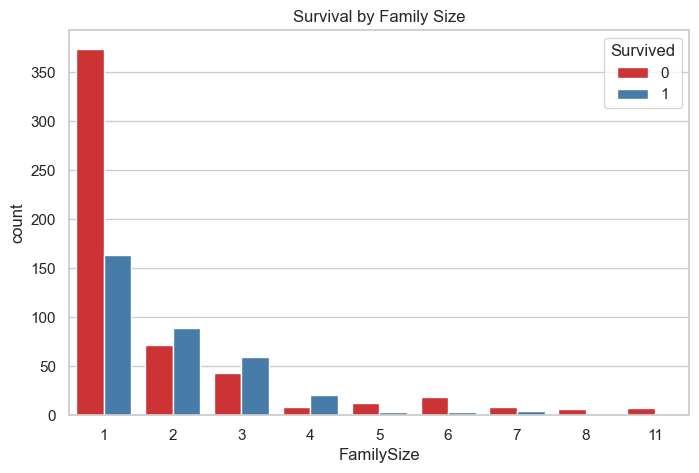

In [43]:
# Family size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
plt.figure(figsize=(8,5))
sns.countplot(x='FamilySize', hue='Survived', data=train, palette="Set1")
plt.title("Survival by Family Size")
plt.show()


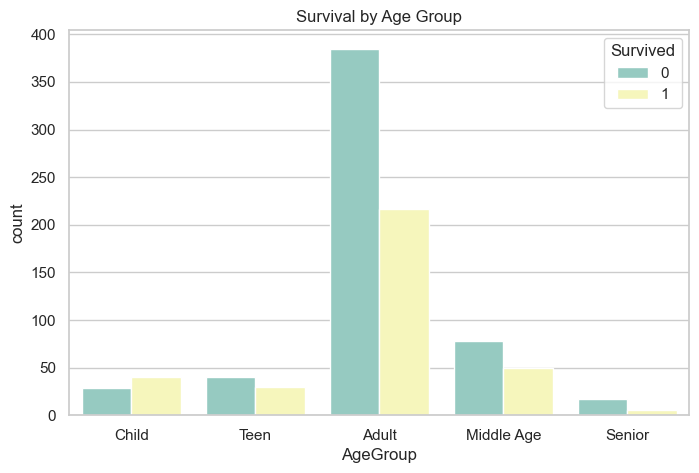

In [45]:
# Age bins
train['AgeGroup'] = pd.cut(train['Age'], bins=[0,12,18,40,60,80], labels=['Child','Teen','Adult','Middle Age','Senior'])
plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', hue='Survived', data=train, palette="Set3")
plt.title("Survival by Age Group")
plt.show()